Selected features:
Index(['Big_Nose', 'Heavy_Makeup', 'Male', 'Pointy_Nose', 'Young'], dtype='object')

Accuracy of QDA model: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76     29734
           1       0.80      0.65      0.72     31046

    accuracy                           0.74     60780
   macro avg       0.75      0.74      0.74     60780
weighted avg       0.75      0.74      0.74     60780



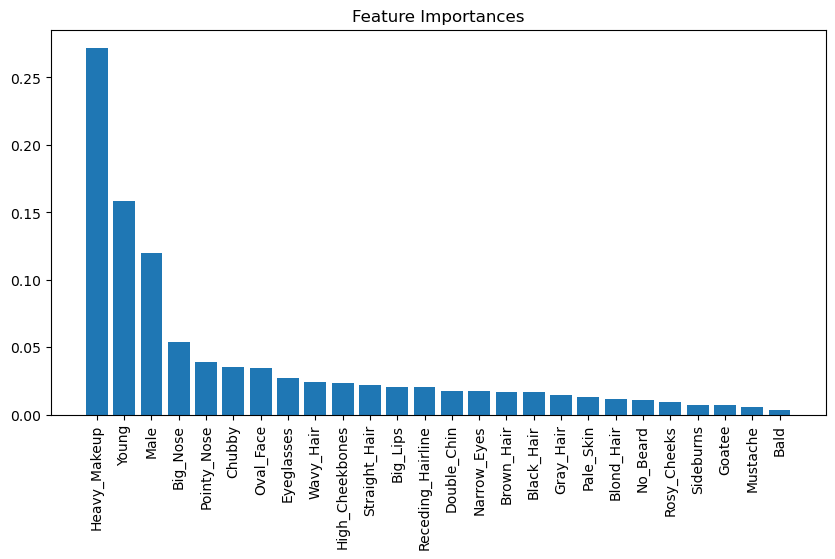

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Load the dataset
celeb_data = pd.read_csv('../list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes',
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open',
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)  # Keep as DataFrame
y = celeb_data["Attractive"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train ExtraTreesClassifier for feature selection
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)  # Fit using DataFrame to keep feature names

# Feature importances
importances = clf.feature_importances_

# Select important features using SelectFromModel
model = SelectFromModel(clf, prefit=True)

# Transform datasets using the selected features (as DataFrame)
X_train_selected = X_train.loc[:, model.get_support()]
X_test_selected = X_test.loc[:, model.get_support()]

# Map selected features
selected_features = X_train_selected.columns
print("Selected features:")
print(selected_features)

# Train QDA model on selected features
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

# Make predictions
y_pred = qda.predict(X_test_selected)

# Evaluate the QDA model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of QDA model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()

In [3]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.6f}")

# recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.6f}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.737957
Precision: 0.797911
Recall: 0.652161
F1 Score: 0.717711
